## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,plot_roc_curve,accuracy_score,RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

## Importing  CSV file

In [2]:
na_values = ['unknown']
df = pd.read_csv('bank-full.csv',na_values=na_values,keep_default_na=False)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


**Separating null 'poutcome' from dataset for prediction**

In [3]:
pout = (df['poutcome'].isnull())
final = df[pout]
pout = ~(df['poutcome'].isnull())
train = df[pout]
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


<AxesSubplot:>

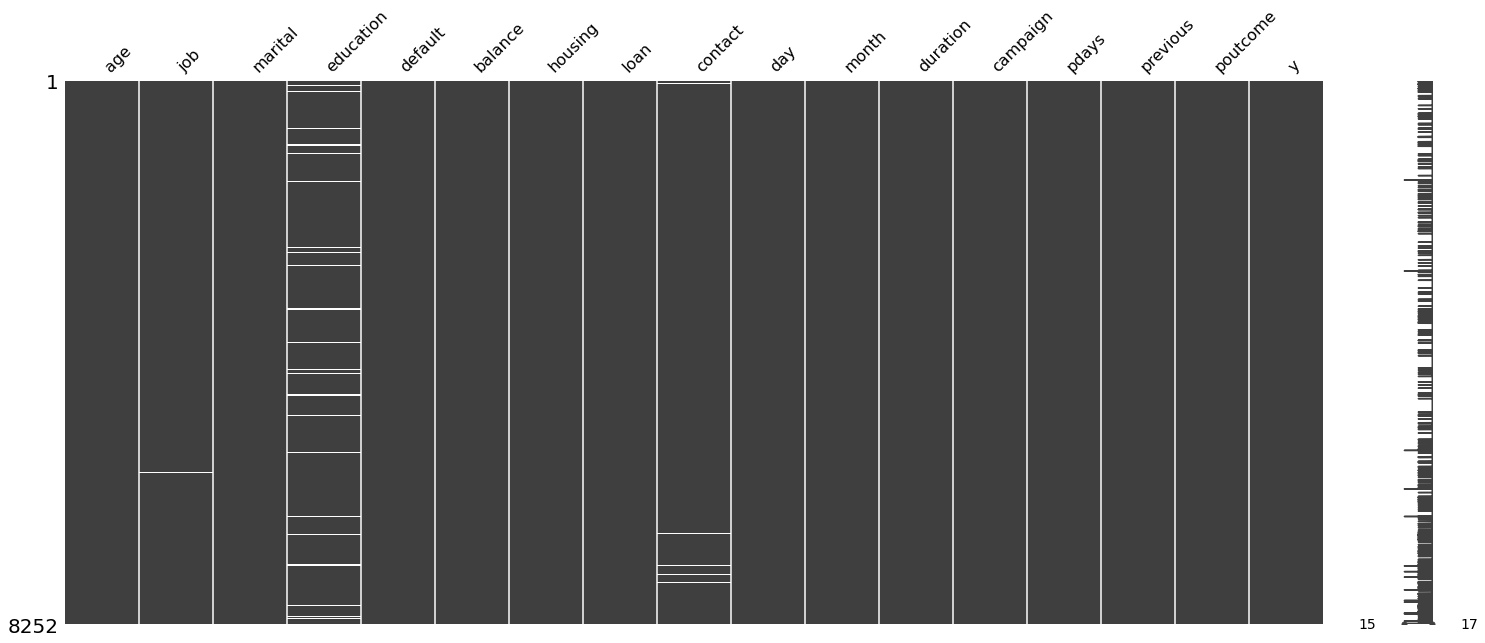

In [4]:
missingno.matrix(train)

In [5]:
train = train.dropna()
train.reset_index(inplace=True)
train = train.drop(columns={'index'})

In [6]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Balancing Classes

In [7]:
train['poutcome'].value_counts()

failure    4679
other      1750
success    1413
Name: poutcome, dtype: int64

In [8]:
failure = train['poutcome'] == 'failure'
failure = train[failure]
failure = failure.sample(frac=0.33,random_state=42)
failure.reset_index(inplace=True)
failure = failure.drop(columns={'index'})

In [9]:
train.drop(train.loc[train['poutcome']=='failure'].index, inplace=True)

In [10]:
frames=[train,failure]
train = pd.concat(frames)
train = train.sample(frac=1,random_state=42)
train.reset_index(inplace=True)
train = train.drop(columns={'index'})

In [11]:
train['poutcome'].value_counts()

other      1750
failure    1544
success    1413
Name: poutcome, dtype: int64

## Encoding Categorical Attributes/Variables

In [12]:
train_od = pd.DataFrame()
train_od['job'] = train['job']
train_od['marital'] = train['marital']
train_od['education'] = train['education']
train_od['default'] = train['default']
train_od['housing'] = train['housing']
train_od['loan'] = train['loan']
train_od['contact'] = train['contact']
train_od['month'] = train['month']
train_od['poutcome'] = train['poutcome']
train_od['y'] = train['y']
train_od

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,single,tertiary,no,yes,no,cellular,may,other,no
1,student,single,secondary,no,no,no,cellular,aug,success,no
2,admin.,divorced,secondary,no,yes,yes,cellular,aug,failure,yes
3,blue-collar,single,secondary,no,yes,no,cellular,feb,failure,no
4,admin.,married,secondary,no,no,no,cellular,sep,success,no
...,...,...,...,...,...,...,...,...,...,...
4702,services,married,secondary,no,yes,yes,cellular,may,failure,no
4703,student,single,secondary,no,yes,no,cellular,feb,other,no
4704,student,single,secondary,no,no,no,cellular,oct,success,yes
4705,management,married,secondary,no,no,no,cellular,may,failure,no


In [13]:
train.drop(columns=list(train_od.columns),inplace=True)

In [14]:
ordinal_encoder = OrdinalEncoder()
train_encoded = pd.DataFrame(ordinal_encoder.fit_transform(train_od),columns=(train_od.columns))
train_encoded

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4.0,2.0,2.0,0.0,1.0,0.0,0.0,8.0,1.0,0.0
1,8.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,1.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4702,7.0,1.0,1.0,0.0,1.0,1.0,0.0,8.0,0.0,0.0
4703,8.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0
4704,8.0,2.0,1.0,0.0,0.0,0.0,0.0,10.0,2.0,1.0
4705,4.0,1.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0


In [15]:
train['job'] = train_encoded['job']
train['marital'] = train_encoded['marital']
train['education'] = train_encoded['education']
train['default'] = train_encoded['default']
train['housing'] = train_encoded['housing']
train['loan'] = train_encoded['loan']
train['contact'] = train_encoded['contact']
train['month'] = train_encoded['month']
train['poutcome'] = train_encoded['poutcome']
train['y'] = train_encoded['y']

## Predicting 'poutcome'

In [16]:
y = train['poutcome']
train = train.drop(columns=['poutcome'])

In [17]:
x_train,x_test,y_train,y_test = train_test_split(train,y)

In [18]:
rnd_clf = RandomForestClassifier(n_estimators=3000,min_samples_split=8,min_samples_leaf=3,n_jobs=-1,random_state=42)
rnd_clf.fit(x_train,y_train)
y_pred = rnd_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.578589634664401

In [19]:
final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,NaN,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes


In [20]:
final.isnull().sum()

age              0
job            255
marital          0
education     1534
default          0
balance          0
housing          0
loan             0
contact      12950
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [21]:
final = final.dropna(subset=['job','education','contact'])
final.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     23065
y                0
dtype: int64

## Encoding Final Dataframe

In [22]:
final_encoded = pd.DataFrame()
final_encoded['job'] = final['job']
final_encoded['marital'] = final['marital']
final_encoded['education'] = final['education']
final_encoded['default'] = final['default']
final_encoded['housing'] = final['housing']
final_encoded['loan'] = final['loan']
final_encoded['contact'] = final['contact']
final_encoded['month'] = final['month']
final_encoded['y'] = final['y']

In [23]:
final_encoded  = pd.DataFrame(ordinal_encoder.fit_transform(final_encoded),columns=(final_encoded.columns))
final_encoded

,job,marital,education,default,housing,loan,contact,month,y
0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,0.0
3,9.0,2.0,1.0,0.0,0.0,0.0,1.0,5.0,0.0
4,9.0,2.0,1.0,0.0,1.0,1.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
23060,8.0,2.0,2.0,0.0,0.0,0.0,0.0,9.0,1.0
23061,9.0,2.0,1.0,0.0,0.0,1.0,0.0,9.0,1.0
23062,9.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,1.0
23063,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0


In [24]:
final = final.drop(columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y'])
final = final.reset_index()
final = final.drop(columns=['index'])
final['job'] = final_encoded['job']
final['marital'] = final_encoded['marital']
final['education'] = final_encoded['education']
final['default'] = final_encoded['default']
final['housing'] = final_encoded['housing']
final['loan'] = final_encoded['loan']
final['contact'] = final_encoded['contact']
final['month'] = final_encoded['month']
final['y'] = final_encoded['y']

In [25]:
poutcome = rnd_clf.predict(final)
final['poutcome'] = poutcome
final

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,y,poutcome
0,27,35,4,255,1,-1,0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0
1,54,466,4,297,1,-1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0
2,43,105,4,668,2,-1,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,0.0,1.0
3,31,19,4,65,2,-1,0,9.0,2.0,1.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0
4,27,126,4,436,4,-1,0,9.0,2.0,1.0,0.0,1.0,1.0,0.0,5.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23060,23,113,17,266,1,-1,0,8.0,2.0,2.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0
23061,25,505,17,386,2,-1,0,9.0,2.0,1.0,0.0,0.0,1.0,0.0,9.0,1.0,2.0
23062,51,825,17,977,3,-1,0,9.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0
23063,71,1729,17,456,2,-1,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0


In [26]:
train['poutcome'] = y
train

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,y,poutcome
0,38,15030,13,167,1,174,7,4.0,2.0,2.0,0.0,1.0,0.0,0.0,8.0,0.0,1.0
1,26,1608,10,89,2,102,2,8.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,53,0,6,1452,1,98,2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,30,144,5,259,1,260,3,1.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
4,60,12980,3,177,2,182,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4702,42,714,8,211,1,358,5,7.0,1.0,1.0,0.0,1.0,1.0,0.0,8.0,0.0,0.0
4703,31,334,5,195,4,233,2,8.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0
4704,29,1925,21,150,3,149,5,8.0,2.0,1.0,0.0,0.0,0.0,0.0,10.0,1.0,2.0
4705,38,341,15,136,3,346,2,4.0,1.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0


In [27]:
train = train.append(final)
train.isna().sum()

age          0
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
y            0
poutcome     0
dtype: int64

## Class Balance for dataframe

In [28]:
train['y'].value_counts()

0.0    23665
1.0     4107
Name: y, dtype: int64

In [29]:
failure = (train['y'] == 0.0)
train_failure = train[failure]
success = ~(train['y'] == 0.0)
train_success = train[success]

In [30]:
train_failure = train_failure.sample(frac=0.1734,random_state=42)
train_failure = train_failure.reset_index()
train_failure = train_failure.drop(columns=['index'])
train_failure

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,y,poutcome
0,35,13,9,364,1,-1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,1.0
1,28,781,9,125,6,-1,0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,29,3054,2,204,1,186,7,8.0,2.0,2.0,0.0,0.0,0.0,0.0,9.0,0.0,2.0
3,58,8218,31,124,10,-1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,1.0
4,26,160,4,172,2,-1,0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,8.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,56,401,20,26,1,-1,0,9.0,0.0,2.0,0.0,1.0,0.0,1.0,9.0,0.0,1.0
4100,56,21,29,324,7,-1,0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0
4101,42,305,28,82,4,-1,0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4102,34,144,23,115,16,-1,0,9.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [31]:
train_success = train_success.reset_index()
train_success = train_success.drop(columns=['index'])
train_success

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,y,poutcome
0,53,0,6,1452,1,98,2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1,36,7506,6,839,2,188,1,4.0,2.0,2.0,0.0,1.0,0.0,0.0,8.0,1.0,2.0
2,36,5958,22,155,1,184,1,4.0,2.0,2.0,0.0,1.0,0.0,0.0,11.0,1.0,2.0
3,22,691,30,260,5,103,1,8.0,2.0,2.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0
4,35,1286,5,862,3,337,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,8.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,34,557,17,224,1,-1,0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0
4103,23,113,17,266,1,-1,0,8.0,2.0,2.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0
4104,25,505,17,386,2,-1,0,9.0,2.0,1.0,0.0,0.0,1.0,0.0,9.0,1.0,2.0
4105,51,825,17,977,3,-1,0,9.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0


In [32]:
train = pd.concat([train_success,train_failure])
train = train.reset_index()
train = train.drop(columns=['index'])
train['y'].value_counts()

1.0    4107
0.0    4104
Name: y, dtype: int64

## Shuffle and split the dataframe

In [33]:
train = train.sample(frac=1,random_state=42)
train

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,y,poutcome
3139,29,615,18,373,1,-1,0,9.0,2.0,2.0,0.0,1.0,0.0,0.0,8.0,1.0,2.0
3409,73,1609,14,169,2,-1,0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0,1.0,2.0
1374,61,1853,10,520,1,181,2,5.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
1545,40,2998,18,623,3,-1,0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,1.0,2.0
8165,47,510,11,299,3,-1,0,6.0,0.0,1.0,0.0,1.0,0.0,0.0,8.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,25,715,4,254,4,-1,0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0
5191,38,0,5,263,2,-1,0,7.0,1.0,1.0,0.0,1.0,0.0,0.0,8.0,0.0,1.0
5390,38,3234,8,281,1,141,2,9.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
860,37,197,15,531,1,91,2,9.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0


In [34]:
y = train['y']
train = train.drop(columns=['y'])

In [35]:
x_train,x_test,y_train,y_test = train_test_split(train,y)

## Logistic Regression

In [36]:
lr_clf = LogisticRegression(solver='lbfgs',max_iter=5000,random_state=42)
lr_clf.fit(x_train,y_train)
y_pred = lr_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9376522162688748

In [37]:
confusion_matrix(y_test,y_pred)

array([[963,  61],
       [ 67, 962]], dtype=int64)

<AxesSubplot:>

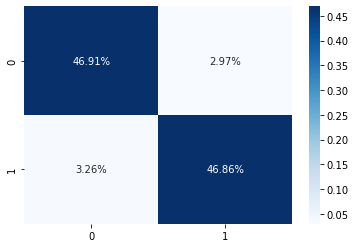

In [38]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

In [39]:
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{precision_score(y_test,y_pred)}')
print(f'F1 Score:{precision_score(y_test,y_pred)}')

Precision Score:0.9403714565004888
Recall Score:0.9403714565004888
F1 Score:0.9403714565004888


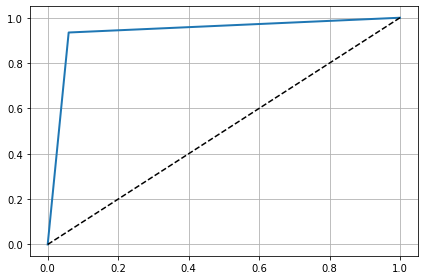

In [40]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
def plot_roc_curves(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curves(fpr,tpr)
plt.tight_layout()
plt.grid()
plt.show()

In [41]:
roc_auc_score(y_test,y_pred)

0.937658964255345

## SVC

In [42]:
svm_clf = LinearSVC(C=0.01,loss='hinge',random_state=42)
svm_clf.fit(x_train,y_train)
y_pred = svm_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9069654164637116

In [43]:
polynomial_svm_clf = Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=0.001,loss='hinge',random_state=42))
])
polynomial_svm_clf.fit(x_train,y_train)
y_pred = polynomial_svm_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9527520701412567

In [44]:
confusion_matrix(y_test,y_pred)

array([[987,  37],
       [ 60, 969]], dtype=int64)

<AxesSubplot:>

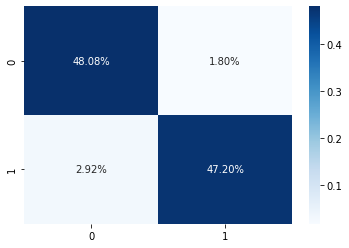

In [45]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

In [46]:
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{precision_score(y_test,y_pred)}')
print(f'F1 Score:{precision_score(y_test,y_pred)}')

Precision Score:0.963220675944334
Recall Score:0.963220675944334
F1 Score:0.963220675944334


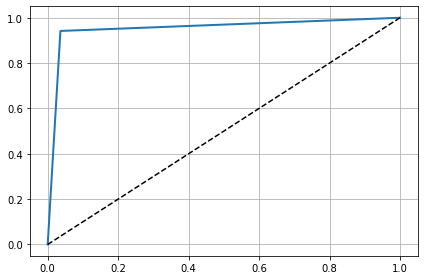

In [47]:
fpr_svm,tpr_svm,thresholds_svm = roc_curve(y_test,y_pred)
def plot_roc_curves(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curves(fpr_svm,tpr_svm)
plt.tight_layout()
plt.grid()
plt.show()

In [48]:
roc_auc_score(y_test,y_pred)

0.9527790747995627

## Decision Tree

In [49]:
tree_clf = DecisionTreeClassifier(max_depth=7,min_samples_split=2,max_features=16,random_state=42)
tree_clf.fit(x_train,y_train)
y_pred = tree_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9566488066244521

In [50]:
confusion_matrix(y_test,y_pred)

array([[967,  57],
       [ 32, 997]], dtype=int64)

<AxesSubplot:>

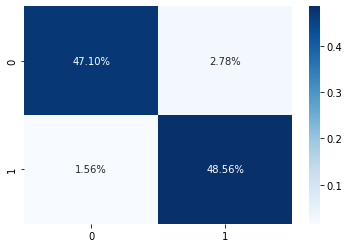

In [51]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

In [52]:
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{precision_score(y_test,y_pred)}')
print(f'F1 Score:{precision_score(y_test,y_pred)}')

Precision Score:0.9459203036053131
Recall Score:0.9459203036053131
F1 Score:0.9459203036053131


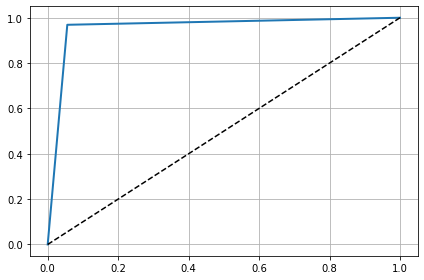

In [53]:
fpr_tree,tpr_tree,thresholds_tree = roc_curve(y_test,y_pred)
def plot_roc_curves(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curves(fpr_tree,tpr_tree)
plt.tight_layout()
plt.grid()
plt.show()

In [54]:
roc_auc_score(y_test,y_pred)

0.9566188919764333

## RandomForest

In [55]:
rnd_clf = RandomForestClassifier(n_estimators=1500,random_state=42,n_jobs=-1,bootstrap=True)
rnd_clf.fit(x_train,y_train)
y_pred = rnd_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9673648319532392

In [56]:
confusion_matrix(y_test,y_pred)

array([[ 972,   52],
       [  15, 1014]], dtype=int64)

<AxesSubplot:>

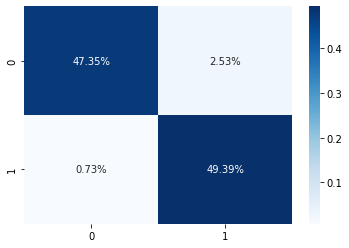

In [57]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

In [58]:
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{precision_score(y_test,y_pred)}')
print(f'F1 Score:{precision_score(y_test,y_pred)}')

Precision Score:0.9512195121951219
Recall Score:0.9512195121951219
F1 Score:0.9512195121951219


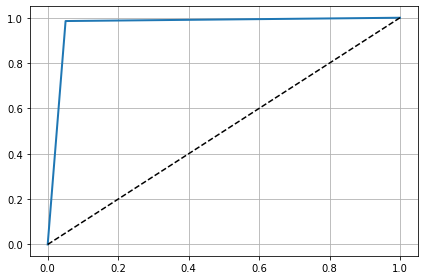

In [59]:
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_test,y_pred)
def plot_roc_curves(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curves(fpr_forest,tpr_forest)
plt.tight_layout()
plt.grid()
plt.show()

In [60]:
roc_auc_score(y_test,y_pred)

0.9673207452623906

In [61]:
pd.DataFrame({'col_name': rnd_clf.feature_importances_}, index=train.columns).sort_values(by='col_name', ascending=False)

,col_name
poutcome,0.615298
duration,0.155140
pdays,0.058405
previous,0.038432
age,0.022662
balance,0.022261
month,0.019955
day,0.017963
housing,0.014018
job,0.010225


## Voting Classifier

In [62]:
voting_clf = VotingClassifier(
    estimators=[('lr',lr_clf),('lsvc',svm_clf),('psvm',polynomial_svm_clf),('tree',tree_clf),('rnd',rnd_clf)],
    voting='hard')
voting_clf.fit(x_train,y_train)
y_pred = rnd_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9673648319532392

In [63]:
confusion_matrix(y_test,y_pred)

array([[ 972,   52],
       [  15, 1014]], dtype=int64)

<AxesSubplot:>

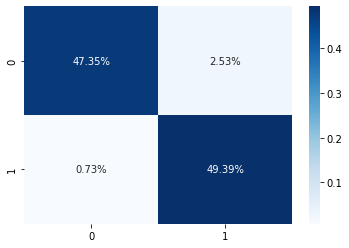

In [64]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

In [65]:
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{precision_score(y_test,y_pred)}')
print(f'F1 Score:{precision_score(y_test,y_pred)}')

Precision Score:0.9512195121951219
Recall Score:0.9512195121951219
F1 Score:0.9512195121951219


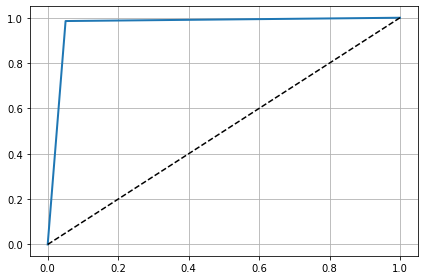

In [66]:
fpr_voting,tpr_voting,thresholds_voting = roc_curve(y_test,y_pred)
def plot_roc_curves(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curves(fpr_voting,tpr_voting)
plt.tight_layout()
plt.grid()
plt.show()

In [67]:
roc_auc_score(y_test,y_pred)

0.9673207452623906

## All ROC curves compared

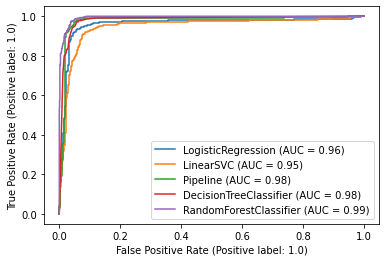

In [68]:
disp = RocCurveDisplay.from_estimator(lr_clf,x_test,y_test)
RocCurveDisplay.from_estimator(svm_clf,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(polynomial_svm_clf,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(tree_clf,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(rnd_clf,x_test,y_test,ax=disp.ax_)